<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

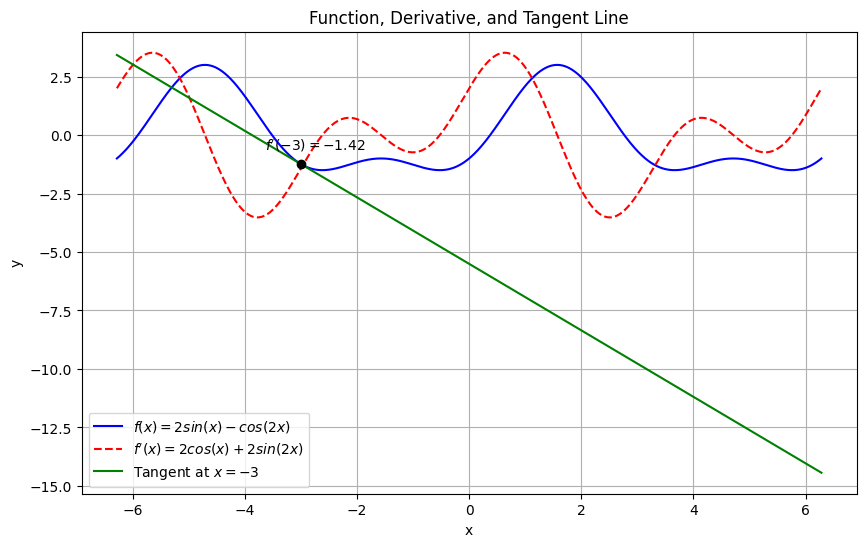

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#определение функций
f = lambda x: 2 * np.sin(x) - np.cos(2 * x)
der_f = lambda x: 2 * np.cos(x) + 2 * np.sin(2 * x)

def beauty_derivative_plot(x_point):

    #определение диапазона
    x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    y = f(x)
    der_y = der_f(x)

    #вычисление значений в точке
    y_point = f(x_point)
    der_y_point = der_f(x_point)
    tangent = der_y_point * (x - x_point) + y_point

    #Построение графика
    plt.figure(figsize=(10, 6))                        #создаем окно графика с заданным размером
    plt.plot(x, y, label='$f(x) = 2sin(x) - cos(2x)$', color='blue')
    plt.plot(x, der_y, label="$f'(x) = 2cos(x) + 2sin(2x)$", color='red', linestyle='--')
    plt.plot(x, tangent, label=f'Tangent at $x = {x_point}$', color='green')
    plt.plot(x_point, y_point, 'ko')  # Точка касания

    #легенда
    plt.annotate(f"$f'({x_point}) = {der_y_point:.2f}$",
                 (x_point, y_point),
                 textcoords="offset points",
                 xytext=(10,10),
                 ha='center')

    plt.title("Function, Derivative, and Tangent Line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

beauty_derivative_plot(-3)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

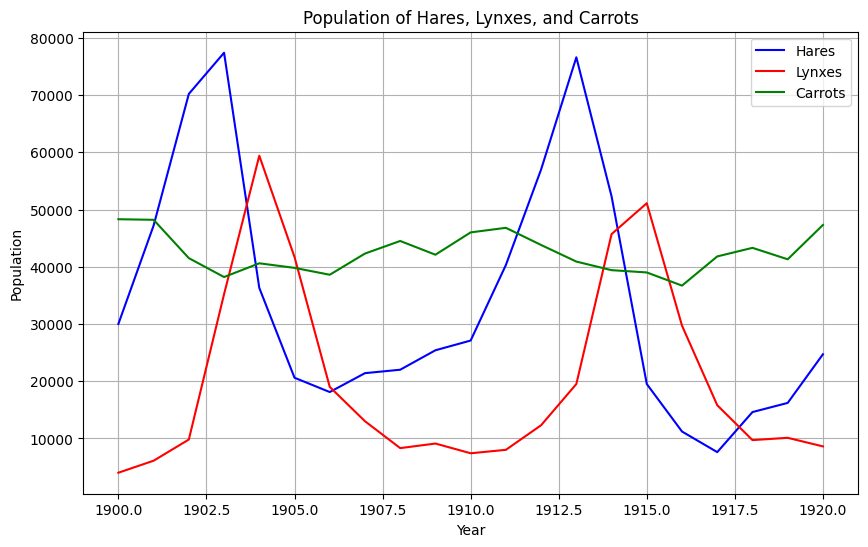

In [4]:
#чтение данных
data = np.loadtxt('populations.txt')
years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

#построение графика
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Hares', color='blue')
plt.plot(years, lynxes, label='Lynxes', color='red')
plt.plot(years, carrots, label='Carrots', color='green')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of Hares, Lynxes, and Carrots')
plt.legend()
plt.grid(True)
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

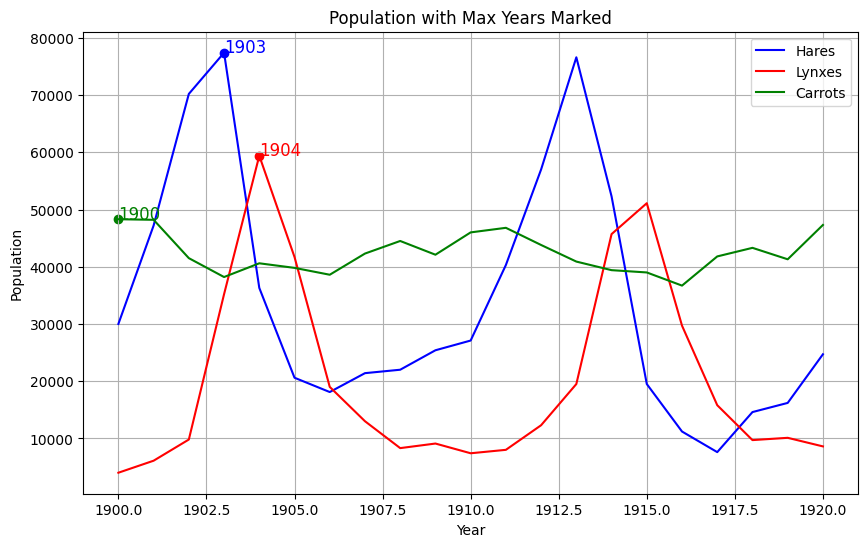

In [5]:
#определение максимального года каждой популяции
max_hares_year = years[np.argmax(hares)]
max_lynxes_year = years[np.argmax(lynxes)]
max_carrots_year = years[np.argmax(carrots)]

plt.figure(figsize=(10, 6))
#графики численности
plt.plot(years, hares, label='Hares', color='blue')
plt.plot(years, lynxes, label='Lynxes', color='red')
plt.plot(years, carrots, label='Carrots', color='green')

#обозначение точек через график диаграммы рассения
plt.scatter(max_hares_year, max(hares), color='blue')
plt.scatter(max_lynxes_year, max(lynxes), color='red')
plt.scatter(max_carrots_year, max(carrots), color='green')

#подпись года
plt.text(max_hares_year, max(hares), f'{max_hares_year}', color='blue', fontsize=12)
plt.text(max_lynxes_year, max(lynxes), f'{max_lynxes_year}', color='red', fontsize=12)
plt.text(max_carrots_year, max(carrots), f'{max_carrots_year}', color='green', fontsize=12)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population with Max Years Marked')
plt.legend()
plt.grid(True)
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

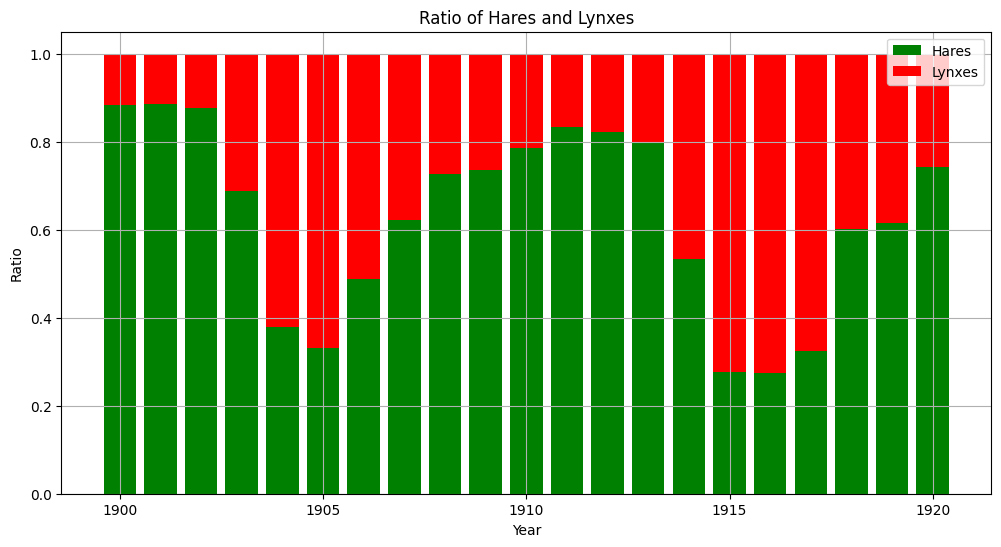

In [6]:
#преобразование данных в ratio
total_population = hares + lynxes
hares_ratio = hares / total_population
lynxes_ratio = lynxes / total_population

plt.figure(figsize=(12, 6))
plt.bar(years, hares_ratio, label='Hares', color='green')
plt.bar(years, lynxes_ratio, bottom=hares_ratio, label='Lynxes', color='red')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Ratio of Hares and Lynxes')
plt.legend()
plt.grid(True)
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

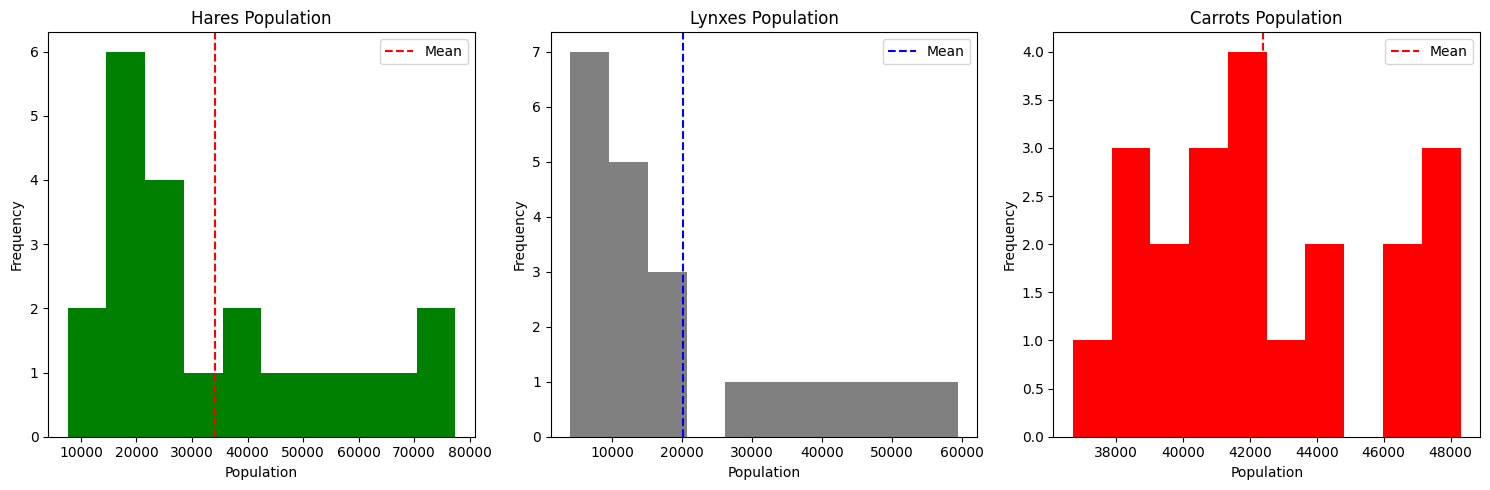

In [7]:
#среднее значени
mean_hares = np.mean(hares)
mean_lynxes = np.mean(lynxes)
mean_carrots = np.mean(carrots)

#создание окна графика
plt.figure(figsize=(15, 5))

#построение подграфиков: гистаграмм и линий средний значний
plt.subplot(1, 3, 1)
plt.hist(hares, bins=10, color='green', alpha=1)
plt.axvline(mean_hares, color='red', linestyle='--', label='Mean')
plt.title('Hares Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(lynxes, bins=10, color='grey', alpha=1)
plt.axvline(mean_lynxes, color='blue', linestyle='--', label='Mean')
plt.title('Lynxes Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(carrots, bins=10, color='red', alpha=1)
plt.axvline(mean_carrots, color='red', linestyle='--', label='Mean')
plt.title('Carrots Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout() #автоматическая автоматизация расстояний
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


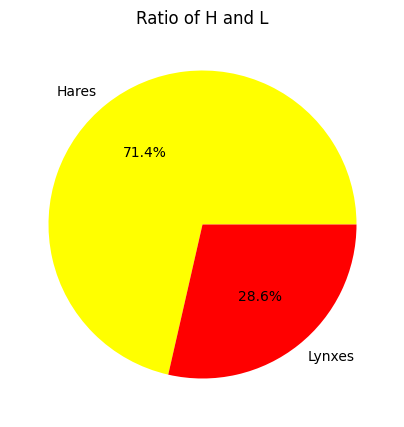

In [8]:
#вычисление массива со сравнениями
comparison = np.where(hares > lynxes, 'H', 'L')
print(comparison)

#вычисление кол-ва H и L
h_count = np.sum(comparison == 'H')
l_count = np.sum(comparison == 'L')

#построение piechart
labels = ['Hares', 'Lynxes']
sizes = [h_count, l_count]
colors = ['yellow', 'red']
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Ratio of H and L')
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

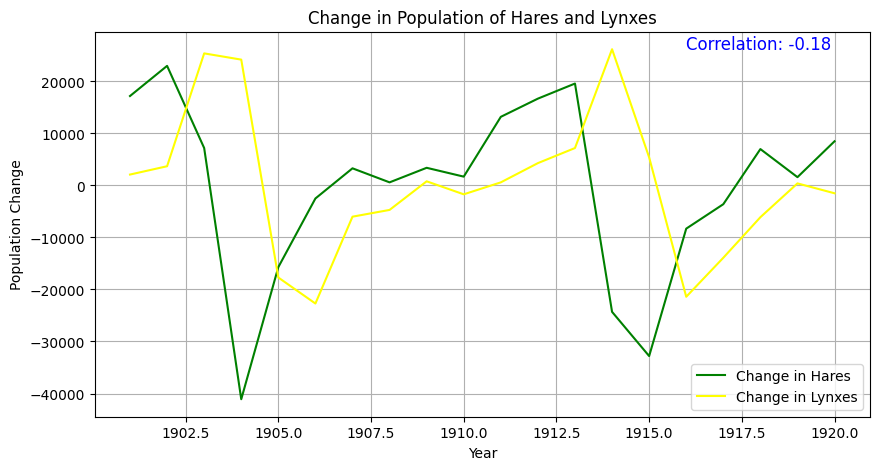

In [9]:
#вычисление массива изменений популяции
delta_hares = np.diff(hares)
delta_lynxes = np.diff(lynxes)

#вычисление корреляции (берем для рыси и зайцев)
correlation = np.corrcoef(delta_hares, delta_lynxes)[0, 1]

#графики линий
plt.figure(figsize=(10, 5))
plt.plot(years[1:], delta_hares, label='Change in Hares', color='green')
plt.plot(years[1:], delta_lynxes, label='Change in Lynxes', color='yellow')

#добавление корреляции на график
plt.text(years[-5], max(max(delta_hares), max(delta_lynxes)),
         f'Correlation: {correlation:.2f}',
         fontsize=12, color='blue')

plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Change in Population of Hares and Lynxes')
plt.legend()
plt.grid(True)
plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

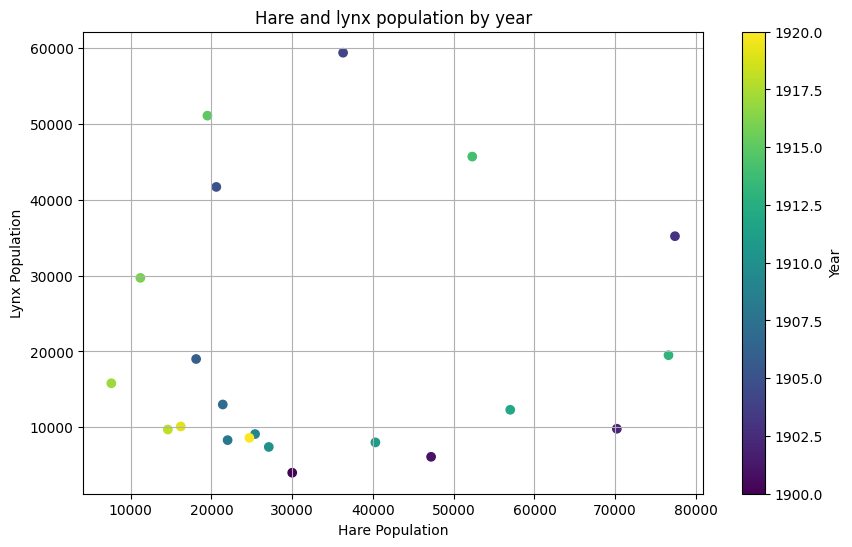

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(hares, lynxes, c=years)      #scatter plot цвет точек зависит от года

plt.xlabel('Hare Population')
plt.ylabel('Lynx Population')
plt.title('Hare and lynx population by year')
plt.colorbar(label='Year')
plt.grid(True)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [17]:
#используем интерполяцию данный за 1918 и 1919 годы
y = np.array([hares[18], hares[19]])
estimated_hare_1920 = np.interp(1920, [1918, 1919], y)

true_hare_1920 = hares[20]

error = abs(estimated_hare_1920 - true_hare_1920)
error_ratio = error / true_hare_1920

print(f"Estimated hare population in 1920: {estimated_hare_1920}")
print(f"True hare population in 1920: {true_hare_1920}")
print(f"Error ratio: {error_ratio:.2%}")

Estimated hare population in 1920: 16200.0
True hare population in 1920: 24700.0
Error ratio: 34.41%
